<a href="https://colab.research.google.com/github/Ajeyanth/HousePrices/blob/main/HousesPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from google.colab import files


In [2]:
# Step 1: Upload the file
uploaded = files.upload()


Saving 2018-2022.csv to 2018-2022.csv


In [3]:
# Import the data
df = pd.read_csv("2018-2022.csv")
df['deed_date']=pd.to_datetime(df['deed_date'])
df=pd.DataFrame(df)
df= df.drop_duplicates(subset=['price_paid','deed_date','street','paon','saon','estate_type', 'district'])
print(df.columns.values)
df=df.loc[:,['price_paid','deed_date','street', 'postcode','property_type','estate_type', 'district']]
print(df)

df['deed_date'] = df['deed_date'].apply(lambda x: x.timestamp())
df_2= df.sort_values(by='price_paid', ascending=True)
print(df_2)

['unique_id' 'price_paid' 'deed_date' 'postcode' 'property_type'
 'new_build' 'estate_type' 'saon' 'paon' 'street' 'locality' 'town'
 'district' 'county' 'transaction_category'
 'linked_data_uri"8355F008-E750-55C5-E053-6B04A8C0D090"' '233500'
 '2018-11-26' 'E1 0AD' 'F' 'N' 'L' 'FLAT 4' 'BILL FAUST HOUSE, 20'
 'TARLING STREET' 'Unnamed: 25' 'LONDON' 'TOWER HAMLETS' 'GREATER LONDON'
 'A'
 'http://landregistry.data.gov.uk/data/ppi/transaction/8355F008-E750-55C5-E053-6B04A8C0D090/current']
        price_paid  deed_date               street postcode property_type  \
0           140000 2019-05-24       TARLING STREET   E1 0AD             F   
1           325000 2020-08-13       TARLING STREET   E1 0AD             F   
2           176000 2018-12-06       TARLING STREET   E1 0AD             F   
3           430500 2018-10-18         CABLE STREET   E1 0AE             F   
4           420000 2021-06-25         CABLE STREET   E1 0AE             F   
...            ...        ...                  

In [4]:
df_cleaned=df_2.dropna()
print(df_cleaned)
print(df_cleaned.isna().any())


        price_paid     deed_date               street  postcode property_type  \
79792       100000  1.538352e+09        COSTER AVENUE    N4 2LD             F   
202943      100000  1.635466e+09        KNIGHTSBRIDGE  SW1X 7LJ             O   
245637      100000  1.613088e+09       EARLHAM STREET  WC2H 9LD             O   
155288      100000  1.536192e+09       CRANFIELD WALK   SE3 9EX             F   
245407      100000  1.607558e+09      PORTUGAL STREET  WC2A 2AT             O   
...            ...           ...                  ...       ...           ...   
174274     2000000  1.547597e+09  CHARLES CLOWES WALK  SW11 7AJ             F   
61167      2000000  1.581466e+09   WOODSIDE PARK ROAD   N12 8RP             O   
61168      2000000  1.581466e+09   WOODSIDE PARK ROAD   N12 8RP             O   
211637     2000000  1.534723e+09        TREBOVIR ROAD   SW5 9TF             F   
211245     2000000  1.638490e+09   COURTFIELD GARDENS   SW5 0PD             F   

       estate_type         

In [5]:
print(df_cleaned['district'])

79792                    HACKNEY
202943       CITY OF WESTMINSTER
245637                    CAMDEN
155288                 GREENWICH
245407       CITY OF WESTMINSTER
                   ...          
174274                WANDSWORTH
61167                     BARNET
61168                     BARNET
211637    KENSINGTON AND CHELSEA
211245    KENSINGTON AND CHELSEA
Name: district, Length: 245244, dtype: object


In [6]:
for x in df_cleaned['district'].unique():
    if df_cleaned['district'].value_counts()[x] < 100:
        df_cleaned = df_cleaned[df_cleaned['district'] != x]

print(df_cleaned['district'])

79792                    HACKNEY
202943       CITY OF WESTMINSTER
245637                    CAMDEN
155288                 GREENWICH
245407       CITY OF WESTMINSTER
                   ...          
174274                WANDSWORTH
61167                     BARNET
61168                     BARNET
211637    KENSINGTON AND CHELSEA
211245    KENSINGTON AND CHELSEA
Name: district, Length: 245157, dtype: object


<ipython-input-7-b6639430957d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kensington['deed_date'] = df_kensington['deed_date'] - df_kensington['deed_date'].min()


Slope: 10973141615380.959
Intercept: 922899.0711602273
R-squared: 0.0007295430020186276
P-value: 0.0454290853177858
Standard error: 5483511316730.409


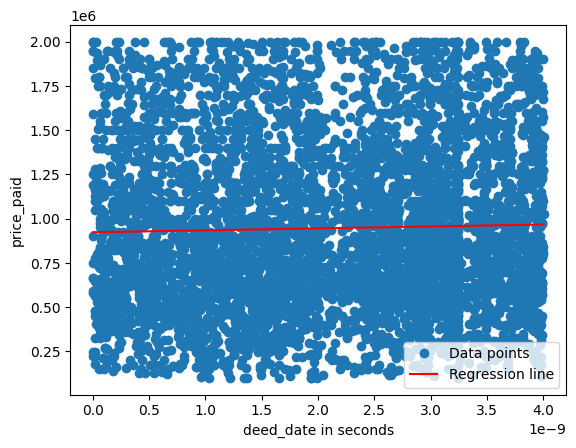

        price_paid     deed_date                   street  postcode  \
178993      395000  4.828155e-08     MORTLAKE HIGH STREET  SW14 8HW   
26859       277000  4.828155e-08              BILLET ROAD   E17 5HE   
83566      1125000  4.828155e-08           SOUTHWOOD LANE    N6 5SY   
116886      535000  4.828155e-08  WESTMINSTER BRIDGE ROAD   SE1 7XA   
38129       247630  4.828155e-08              HAMLETS WAY    E3 4LS   
...            ...           ...                      ...       ...   
152263      875000  5.228378e-08    ST JULIAN'S FARM ROAD  SE27 0RJ   
77139       282500  5.228378e-08          PALMERSTON ROAD   N22 8QT   
69605       310000  5.228378e-08              BREAM CLOSE   N17 9DQ   
224889      815000  5.228378e-08         CHAMBERLAIN ROAD   W13 9EW   
160929      628000  5.228378e-08           DAVENPORT ROAD   SE6 2AS   

       property_type estate_type              district  
178993             F           L  RICHMOND UPON THAMES  
26859              F           L 

In [7]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Convert 'deed_date' to datetime objects
#df_cleaned['deed_date'] = pd.to_datetime(df_cleaned['deed_date'], unit='s')
df_cleaned.sort_values(by='deed_date', inplace = True)
df_cleaned['deed_date']= (pd.to_datetime(df_cleaned['deed_date']).astype(int)/(10**9))/(3.154 * 10**7)
# Calculate time elapsed in seconds since the earliest date for Kensington
df_kensington = df_cleaned[df_cleaned['district'] == 'KENSINGTON AND CHELSEA']

df_kensington['deed_date'] = df_kensington['deed_date'] - df_kensington['deed_date'].min()

# Extract the relevant columns
x = df_kensington['deed_date'].to_numpy()

y = df_kensington['price_paid'].to_numpy()

# Perform linear regression
if len(np.unique(x)) > 1:
  slope, intercept, r_value, p_value, std_err = linregress(x, y)
  print(f"Slope: {slope}")
  print(f"Intercept: {intercept}")
  print(f"R-squared: {r_value**2}")
  print(f"P-value: {p_value}")
  print(f"Standard error: {std_err}")
  # Plot the data and the regression line
  plt.plot(x, y,'o', label='Data points')
  plt.plot(x, intercept + slope*x, color='red', label='Regression line')
  plt.xlabel('deed_date in seconds')
  plt.ylabel('price_paid')
  plt.legend()
  plt.show()
  print(df_cleaned)


In [ ]:
 #new_df = pd.DataFrame({'price_paid','deed_date','street','estate_type', 'district'})
#for x in df_cleaned['deed_date'].unique():
 # x = (df_cleaned['deed_date'] - df_cleaned['deed_date'].min())
 # for y in df_cleaned['price_paid'].unique().numpy:
    #    slope, intercept, r_value, p_value, std_err = linregress(x, y)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

District: RICHMOND UPON THAMES
Slope: 24715638521687.21
Intercept: -306945.5875455118
R-squared: 0.004068798525791938
P-value: 0.00575259367168416
Standard error: 8939567698852.506


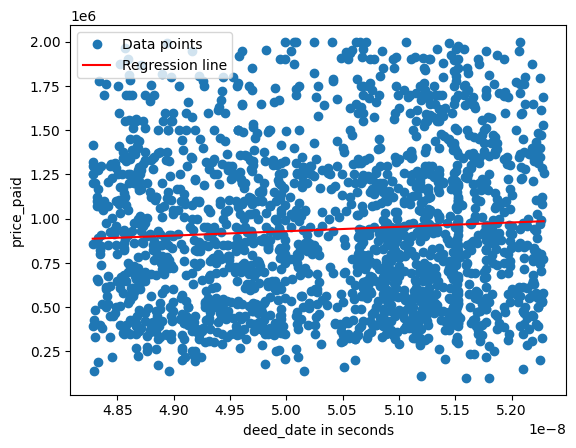

District: WALTHAM FOREST
Slope: 17690298275496.363
Intercept: -407088.3389365949
R-squared: 0.012143852567050436
P-value: 3.344855654296648e-37
Standard error: 1383808292438.307


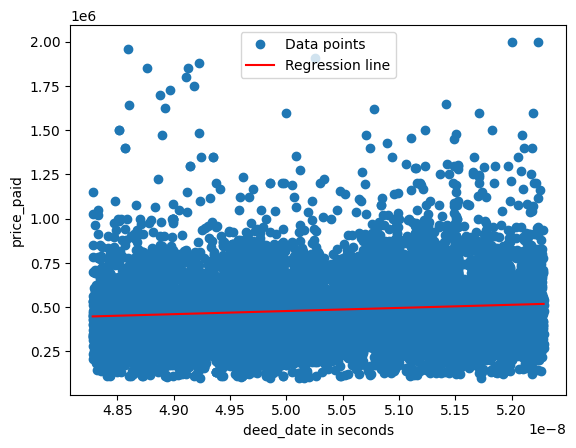

District: HARINGEY
Slope: 16253091401170.744
Intercept: -207812.8874936764
R-squared: 0.0030183700093450133
P-value: 2.1088443213449886e-08
Standard error: 2898611873297.0913


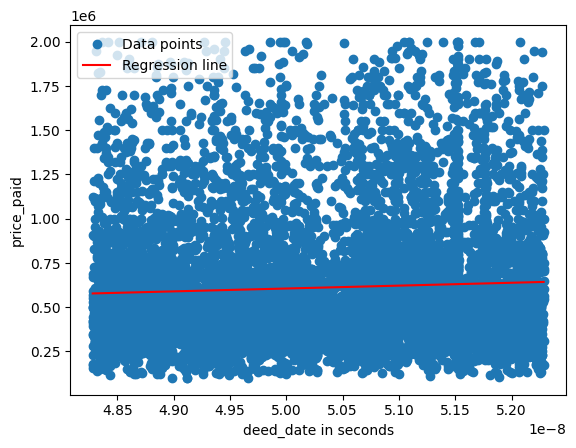

District: LAMBETH
Slope: 16689466631102.574
Intercept: -213574.44271132827
R-squared: 0.003371812853525426
P-value: 7.562023382225067e-14
Standard error: 2229972979281.4805


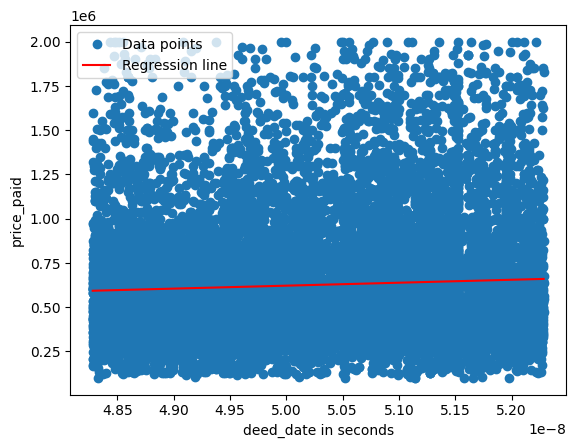

District: TOWER HAMLETS
Slope: 36774870943782.79
Intercept: -1272441.8268691977
R-squared: 0.022585569106752364
P-value: 1.1871827342734663e-87
Standard error: 1842388402609.716


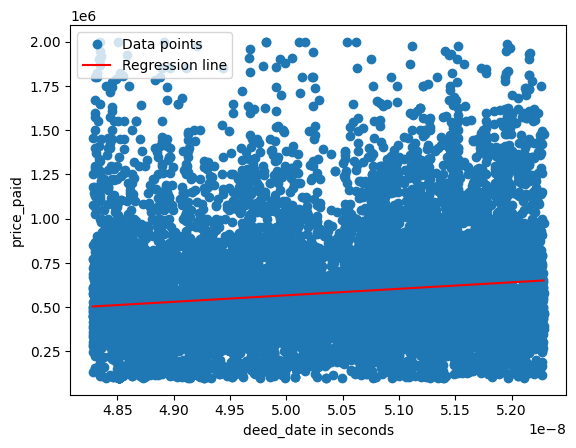

District: HACKNEY
Slope: 14808700147357.041
Intercept: -90159.91083072696
R-squared: 0.002524068798957572
P-value: 8.090748092491129e-08
Standard error: 2758390165521.749


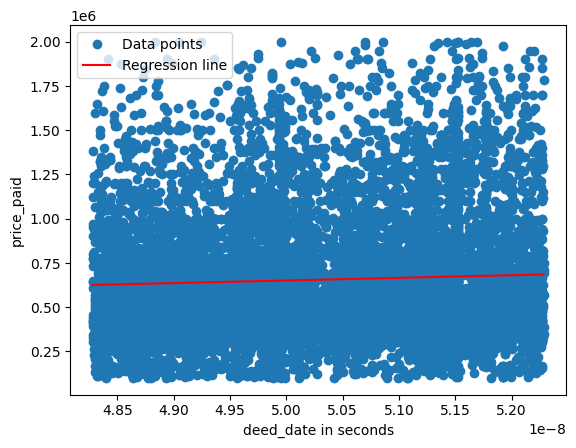

District: EALING
Slope: 15073201413547.338
Intercept: -118785.8634142353
R-squared: 0.002735736066479996
P-value: 5.993783570588538e-07
Standard error: 3017673027502.348


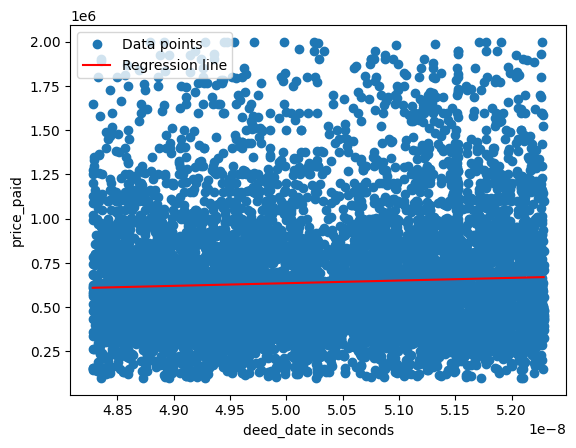

District: CAMDEN
Slope: 2384043198776.1953
Intercept: 697269.3609538064
R-squared: 4.083100252869643e-05
P-value: 0.564517557512944
Standard error: 4137756785529.8584


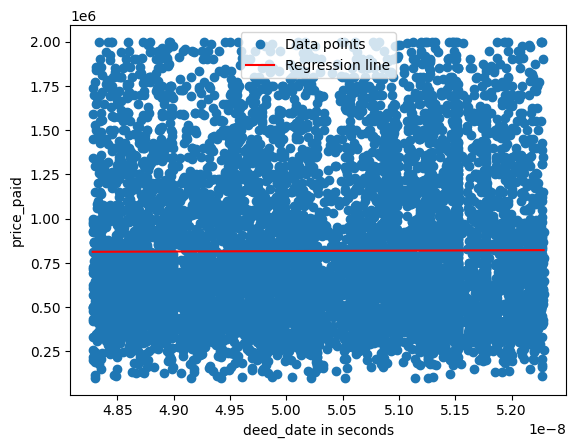

District: CITY OF WESTMINSTER
Slope: 5161706176476.323
Intercept: 601003.6198499417
R-squared: 0.00016893230935392212
P-value: 0.21004462217677478
Standard error: 4117738464041.659


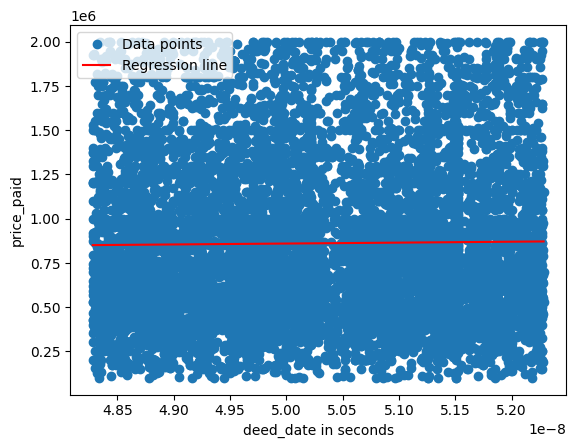

District: WANDSWORTH
Slope: 14029602368960.023
Intercept: 12593.280857017497
R-squared: 0.001957095034459495
P-value: 9.310869926632377e-11
Standard error: 2164732698914.912


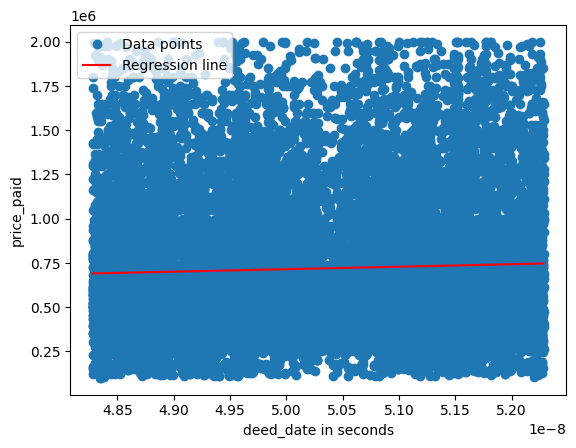

District: GREENWICH
Slope: 8081222689529.824
Intercept: 80306.64509631682
R-squared: 0.0015807728227060622
P-value: 8.153505587492988e-07
Standard error: 1637967852102.1528


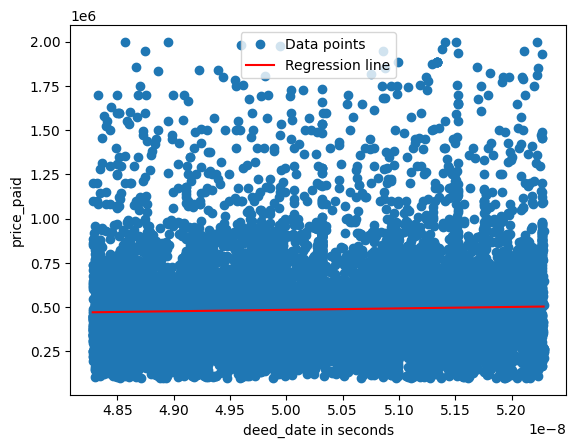

District: NEWHAM
Slope: 1412962722749.4917
Intercept: 368061.3682449941
R-squared: 8.901079324615818e-05
P-value: 0.2956376701409278
Standard error: 1350981611999.319


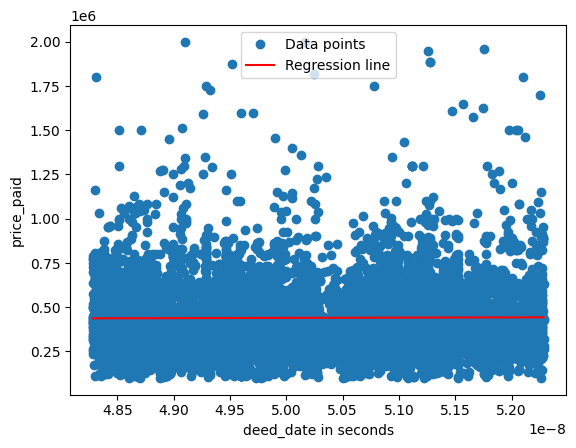

District: BARNET
Slope: 26328197561052.17
Intercept: -715597.1525042421
R-squared: 0.008447755489386309
P-value: 1.1580150932013438e-27
Standard error: 2410361658795.2783


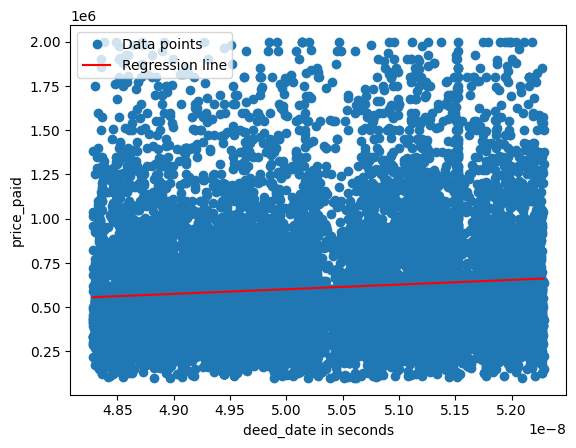

District: HAMMERSMITH AND FULHAM
Slope: 6464093820343.001
Intercept: 479179.4614468924
R-squared: 0.0003019547236552082
P-value: 0.0921598653032885
Standard error: 3837886409812.3657


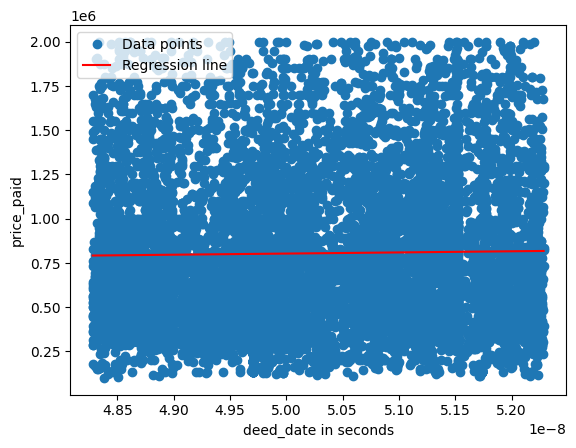

District: BRENT
Slope: 16353809629460.29
Intercept: -239726.58838484949
R-squared: 0.003198663398979459
P-value: 2.2219492526307933e-06
Standard error: 3453030269602.5195


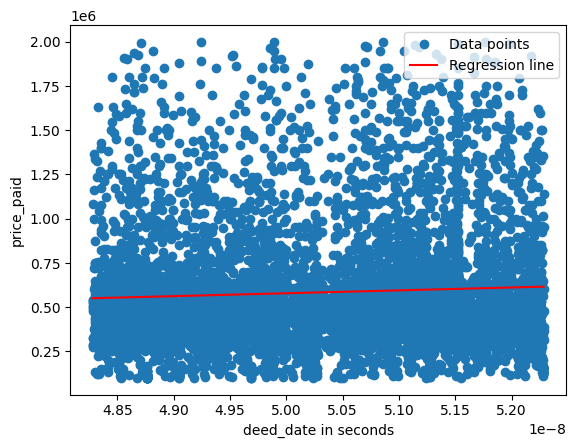

District: LEWISHAM
Slope: 16687512002398.297
Intercept: -349215.1564053894
R-squared: 0.006964048589423369
P-value: 1.8302768736230308e-23
Standard error: 1668836828926.1091


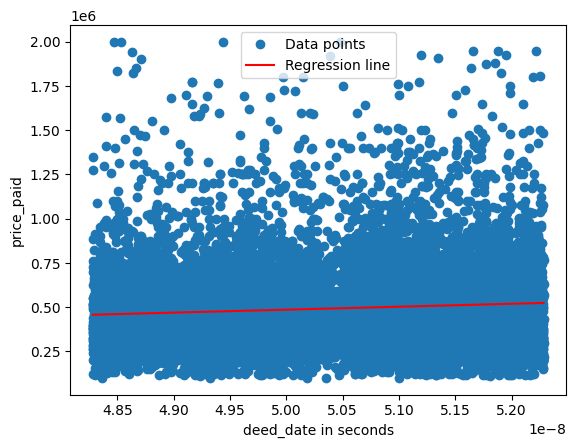

District: MERTON
Slope: 11618942571827.834
Intercept: 87973.49000552588
R-squared: 0.0015216843438232456
P-value: 0.0014166340951117598
Standard error: 3639364090253.6084


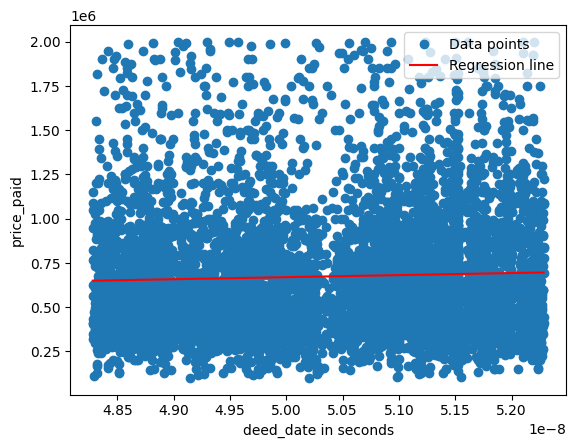

District: SOUTHWARK
Slope: 1583627009927.5674
Intercept: 534551.4035961401
R-squared: 3.295906014489642e-05
P-value: 0.49716189555946944
Standard error: 2332362479570.055


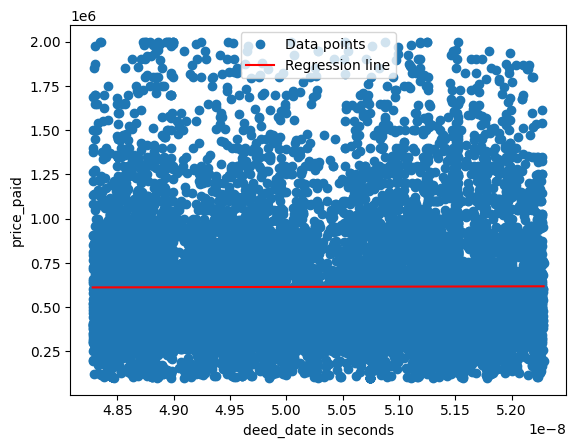

District: HOUNSLOW
Slope: 6379992943950.03
Intercept: 485325.4451319854
R-squared: 0.0003006097398223749
P-value: 0.4498244906276666
Standard error: 8440663517184.978


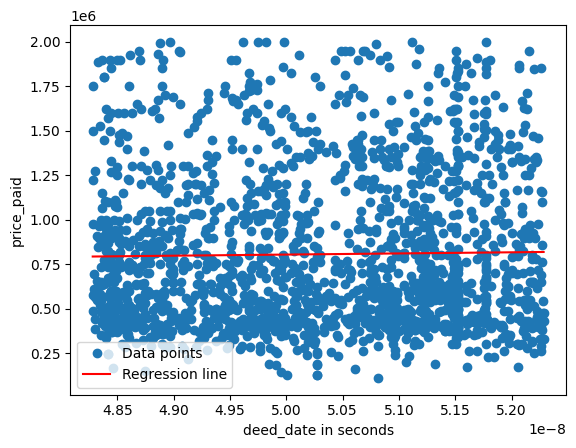

District: ISLINGTON
Slope: 19728511318689.63
Intercept: -283699.20747585583
R-squared: 0.0036576509499188425
P-value: 1.441258689080195e-08
Standard error: 3477142155294.237


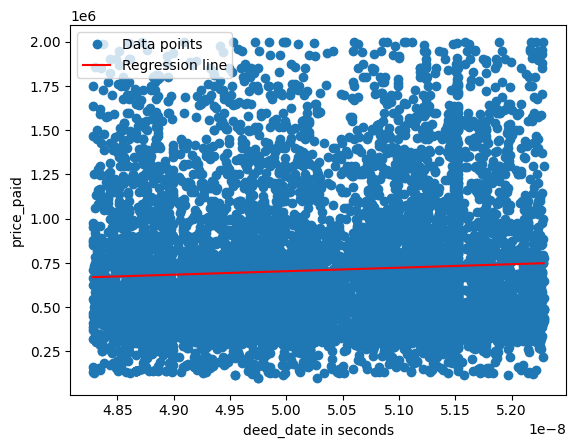

District: KENSINGTON AND CHELSEA
Slope: 10973141615380.959
Intercept: 393098.81586846674
R-squared: 0.0007295430020186276
P-value: 0.0454290853177858
Standard error: 5483511316730.408


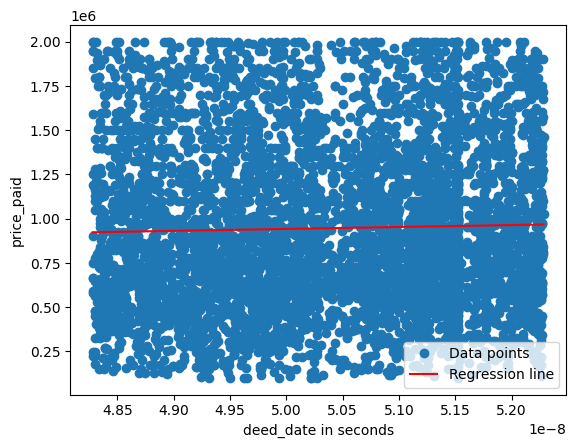

District: ENFIELD
Slope: 14873078880757.637
Intercept: -263879.7194311606
R-squared: 0.004743377944224789
P-value: 2.5327796319639928e-08
Standard error: 2666456366867.064


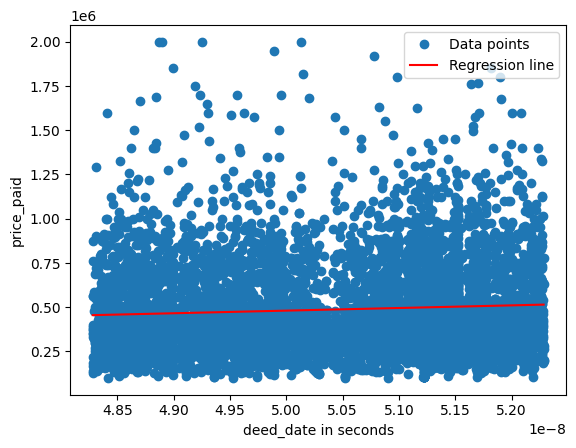

District: CROYDON
Slope: 5662745585323.744
Intercept: 132744.7479220492
R-squared: 0.0012870435809568589
P-value: 0.02436554796071874
Standard error: 2514335463078.7686


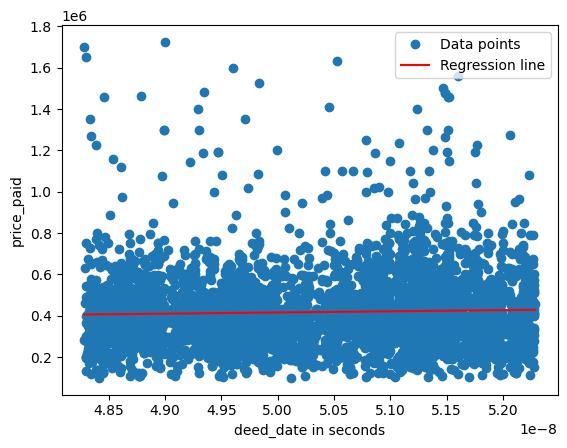

District: REDBRIDGE
Slope: 21190858300895.914
Intercept: -469351.15686908725
R-squared: 0.00679205535584303
P-value: 8.127087198573569e-05
Standard error: 5367794350063.222


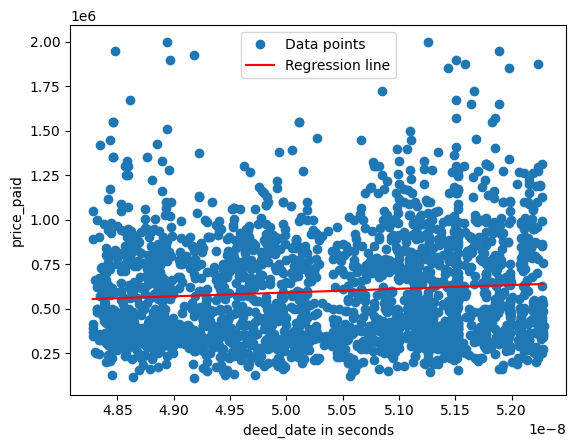

District: CITY OF LONDON
Slope: -28614377440473.336
Intercept: 2331767.251966308
R-squared: 0.007067766592606699
P-value: 0.008360614966302445
Standard error: 10828505040462.545


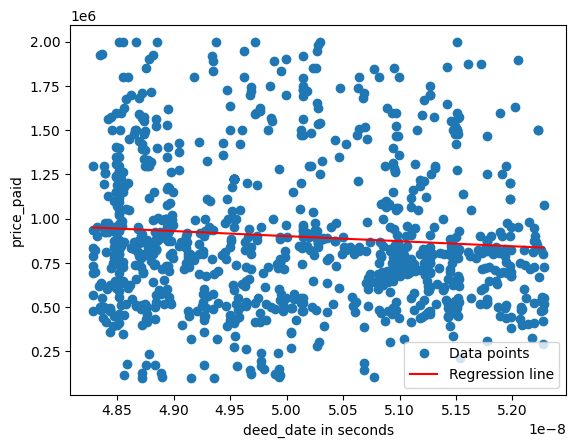

District: BROMLEY
Slope: 6995059602505.394
Intercept: 81836.80294513813
R-squared: 0.0015243706483081892
P-value: 0.039512515747843695
Standard error: 3396022755032.852


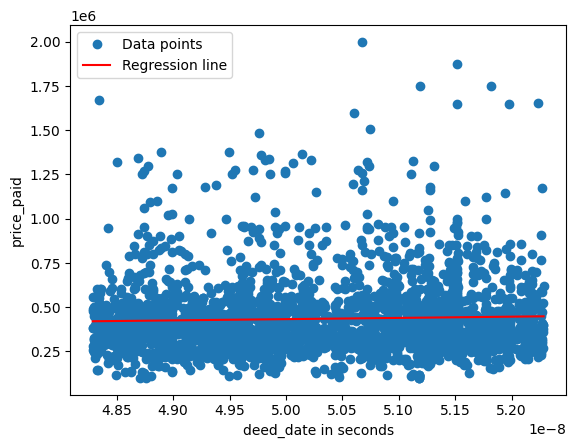

District: BEXLEY
Slope: 14246681682419.035
Intercept: -371770.7464137358
R-squared: 0.016483449243865442
P-value: 0.000921968161762061
Standard error: 4280354904022.806


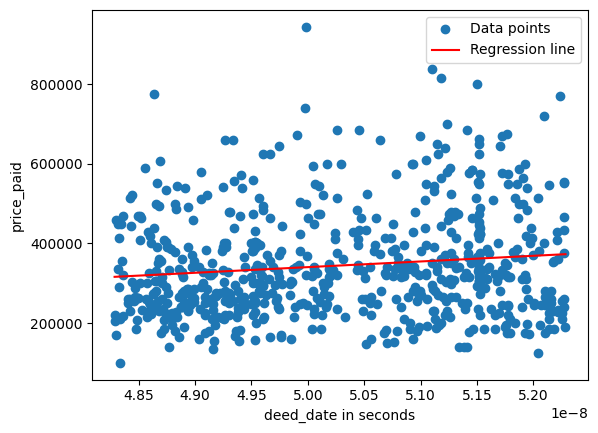

District: KINGSTON UPON THAMES
Slope: -860123082861.0651
Intercept: 783210.282353113
R-squared: 8.380179241445307e-06
P-value: 0.9748604871169395
Standard error: 27236960973834.023


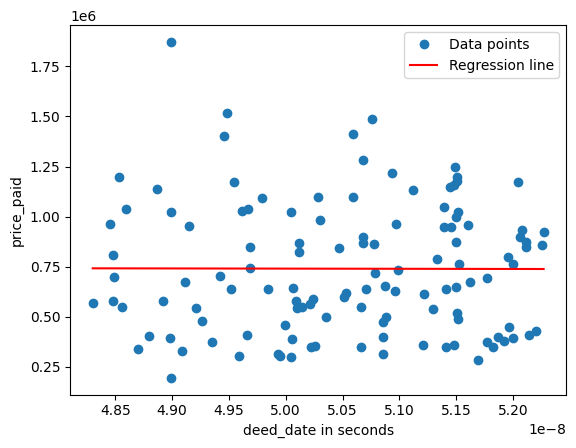

In [9]:
for district in df_cleaned['district'].unique():
    df_district = df_cleaned[df_cleaned['district'] == district]
    x = df_district['deed_date'].to_numpy()  # Get all deed dates for the district
    y = df_district['price_paid'].to_numpy()  # Get all prices for the district

    if len(np.unique(x)) > 1:  # Check if there are at least two unique dates
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        print(f"District: {district}")
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
        print(f"R-squared: {r_value**2}")
        print(f"P-value: {p_value}")
        print(f"Standard error: {std_err}")
        plt.plot(x, y,'o', label='Data points')
        plt.plot(x, intercept + slope*x, color='red', label='Regression line')
        plt.xlabel('deed_date in seconds')
        plt.ylabel('price_paid')
        plt.legend()
        plt.show()
